In [1]:
import pandas as pd
from accre_functions import *

Initializing the data.
Now reading '../data/updated_jobs.csv'.


Reading CSV: 100%|██████████| 7395885/7395885 [00:30<00:00, 244707.68rows/s]


Completed reading '../data/updated_jobs.csv'.
Now reading '../data/servers_9204.csv'.


Reading CSV: 100%|██████████| 314709/314709 [00:01<00:00, 263843.38rows/s]


Completed reading '../data/servers_9204.csv'.


c:\Users\irela\Documents\NSS_Projects\accre-sweet-potato-casserole\notebooks\accre_functions.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.jobs_filtered_by_completed['end_dt_min_start'] = self.jobs_filtered_by_completed['END_dt'].dt.floor('min')


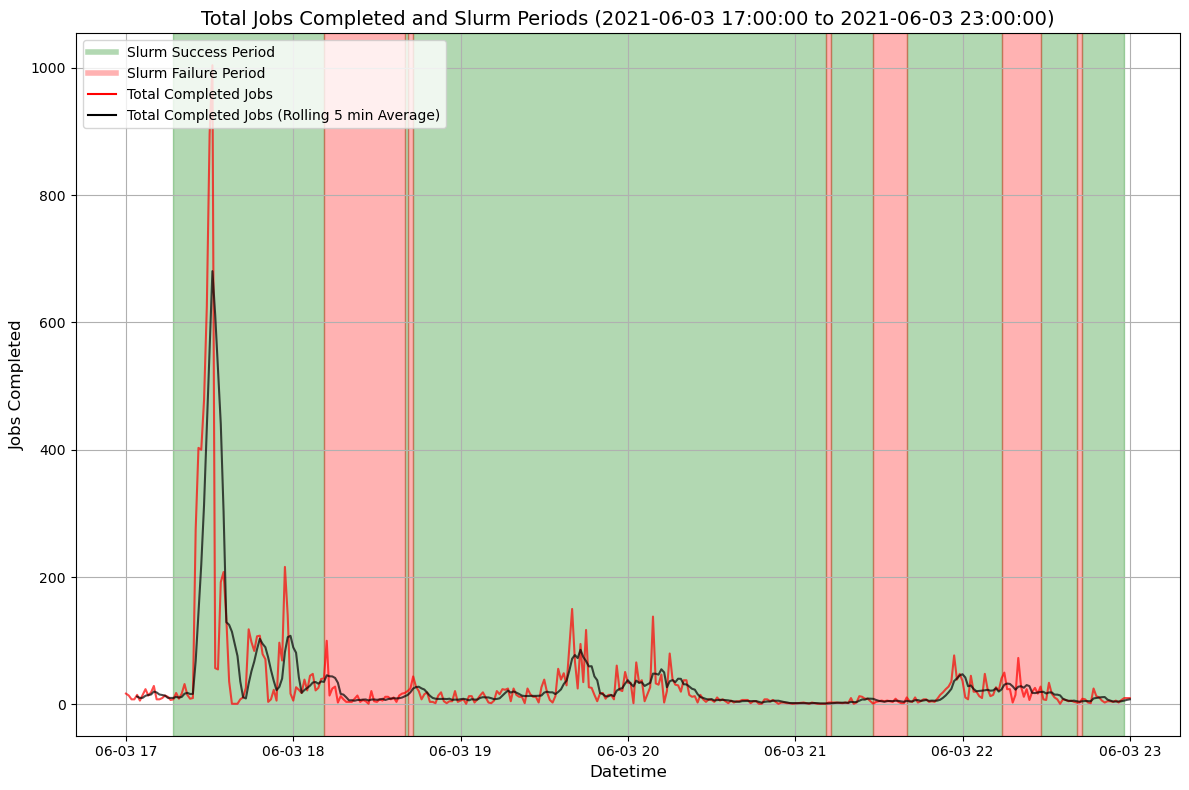

In [2]:
processor = ACCREDataProcessor()
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2021-06-03 17:00:00', end_date='2021-06-03 23:00:00', rolling=5)

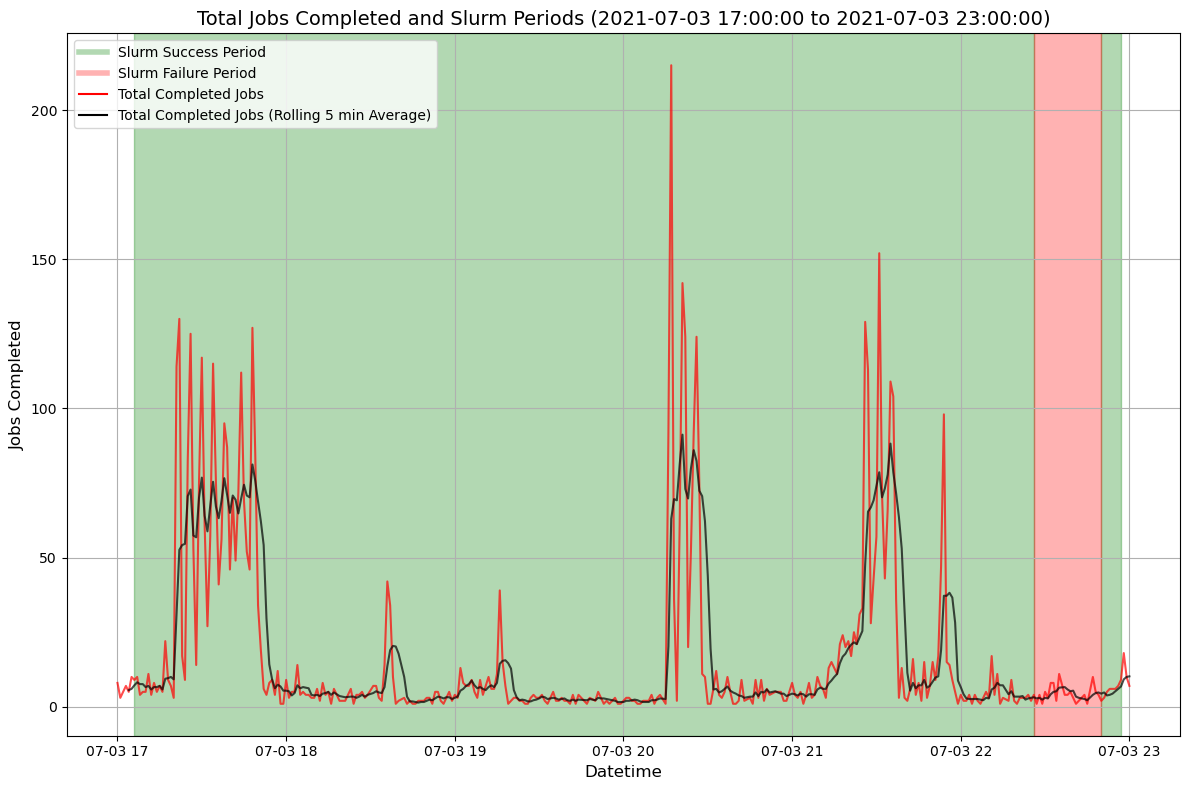

In [3]:
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2021-07-03 17:00:00', end_date='2021-07-03 23:00:00', rolling=5)

In [4]:
data_df = processor.data
data_df.head(2)

,total_completed_jobs,slurm_success
datetime,,
2020-10-01 00:10:00,1.0,NaN
2020-10-01 00:12:00,1.0,NaN


In [5]:
import statsmodels.formula.api as smf
import numpy as np

In [6]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [7]:
window_sizes = [str(x)+'min' for x in range(1, 5)]
results = {}
for window in window_sizes:
    rolling_col_name = f'rolling_completed_jobs_{window}'
    data_df[rolling_col_name] = data_df['total_completed_jobs'].rolling(window).mean()
    formula = f'slurm_success ~ total_completed_jobs + {rolling_col_name}'
    model = smf.logit(formula, data=data_df).fit()
    results[window] = model
    print(f"Summary for {window} rolling average:")
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.176391
         Iterations 7
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                47217
Model:                          Logit   Df Residuals:                    47214
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:               0.0001719
Time:                        17:49:19   Log-Likelihood:                -8328.6
converged:                       True   LL-Null:                       -8330.1
Covariance Type:            nonrobust   LLR p-value:                    0.2388
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1284  

In [8]:
rolling_jobs_completed = 100
total_completed_jobs = 50
rolling_period = '2min'
rolling_formula_result = results[rolling_period].params['Intercept'] + results[rolling_period].params['total_completed_jobs']*total_completed_jobs + results[rolling_period].params['rolling_completed_jobs_'+rolling_period]*rolling_jobs_completed
prob = logistic(rolling_formula_result)
prob

0.984356176070484

In [9]:
processor.data.head()

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min
datetime,,,,,,
2020-10-01 00:10:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:12:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:13:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:17:00,2.0,NaN,2.0,2.0,2.0,2.0
2020-10-01 00:19:00,1.0,NaN,1.0,1.0,1.5,1.5


In [10]:
processor.test_range_rolling_completed_jobs()

Optimization terminated successfully.
         Current function value: 0.176391
         Iterations 7
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                47217
Model:                          Logit   Df Residuals:                    47214
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:               0.0001719
Time:                        17:49:19   Log-Likelihood:                -8328.6
converged:                       True   LL-Null:                       -8330.1
Covariance Type:            nonrobust   LLR p-value:                    0.2388
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1284  

In [11]:
processor.calculate_rolling_probability(rolling_jobs_completed=10, total_completed_jobs=10, rolling_period='2min')

0.9573232982932195